<a href="https://colab.research.google.com/github/Arijitde24/Machine-learning/blob/main/SUPERVISED%20learning/Car(logistic%20regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
URL="https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ["buying","maint","doors","persons","lug_boot","safety","class"]
df=pd.read_csv(URL,names=columns)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
df.shape

(1728, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
print(f"Total Cars: {len(df)}")
print(f"Total Features: {len(df.columns)-1}")

Total Cars: 1728
Total Features: 6


In [ ]:
print("FATURE ANALYSIS")
for col in df.columns:
  unique_values=df[col].nunique()
  print(f"\n {col.upper()}")
  print(f" no. of categories: {unique_values}")
  print(f" unique_categories: {list(df[col].unique())}")
  print(f" Distribution: \n {df[col].value_counts()}")

FATURE ANALYSIS

 BUYING
 no. of categories: 4
 unique_categories: ['vhigh', 'high', 'med', 'low']
 Distribution: 
 buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

 MAINT
 no. of categories: 4
 unique_categories: ['vhigh', 'high', 'med', 'low']
 Distribution: 
 maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

 DOORS
 no. of categories: 4
 unique_categories: ['2', '3', '4', '5more']
 Distribution: 
 doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

 PERSONS
 no. of categories: 3
 unique_categories: ['2', '4', 'more']
 Distribution: 
 persons
2       576
4       576
more    576
Name: count, dtype: int64

 LUG_BOOT
 no. of categories: 3
 unique_categories: ['small', 'med', 'big']
 Distribution: 
 lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

 SAFETY
 no. of categories: 3
 unique_categories: ['low', 'med', 'high']
 Distribution: 
 safety
low     576
med 

In [ ]:
print("Target Variable Analysis")
print(f"original class = {df['class'].unique()}")
class_dist=df['class'].value_counts()
print()
print(f"Class Distribution")
for cls,count in class_dist.items():
  print(f"  {cls}: {count:,} ({(count/len(df)*100):.1f}%)")

Target Variable Analysis
original class = ['unacc' 'acc' 'vgood' 'good']

Class Distribution
  unacc: 1,210 (70.0%)
  acc: 384 (22.2%)
  good: 69 (4.0%)
  vgood: 65 (3.8%)


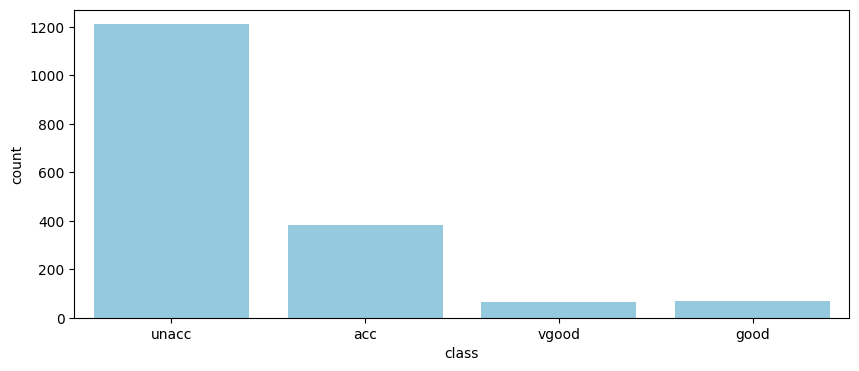

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x="class",color="skyblue")
plt.show()

Text(0.5, 0, 'Acceptable (1 = yes, 0 = no)')

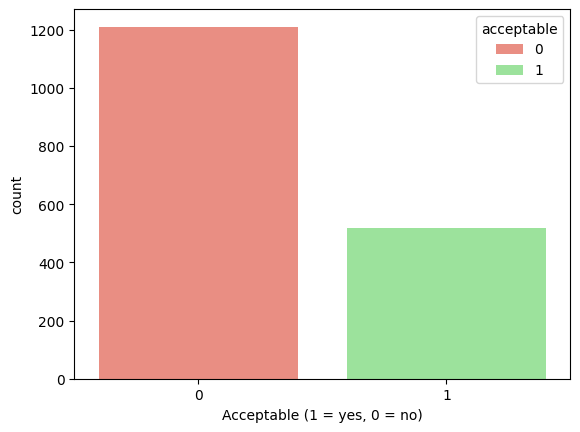

In [ ]:
df['acceptable']=df['class'].isin(['acc','good','vgood']).astype(int)

sns.countplot(data=df, x="acceptable", hue="acceptable", palette={0: "salmon", 1: "lightgreen"}, legend=True)
plt.xlabel("Acceptable (1 = yes, 0 = no)")



In [ ]:
print(f"  Accept cars : {df['acceptable'].sum():,} ({df['acceptable'].mean()*100:.1f}%)")
print(f" Not accp : {(1-df['acceptable']).sum():,} ({(1-df['acceptable'].mean())*100:.1f}%)")

  Accept cars : 518 (30.0%)
 Not accp : 1,210 (70.0%)


In [ ]:
X=df.drop(['class','acceptable'],axis=1)
X.head(2)

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med


In [ ]:
Y=df['acceptable']
Y.head(2)

,acceptable
0,0
1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
print("Applying Label Encoding .....")
le=LabelEncoder()
label_encoders={}
X_encoded=pd.DataFrame()
for col in X.columns:
  X_encoded[col]=le.fit_transform(X[col])
  label_encoders[col]=le
  mapping=dict(zip(le.classes_,le.transform(le.classes_)))
  print(f"\n{col.upper()} encoding:")
  for original,encoded in mapping.items():
    print(f"  {original} --> {encoded}")

Applying Label Encoding .....

BUYING encoding:
  high --> 0
  low --> 1
  med --> 2
  vhigh --> 3

MAINT encoding:
  high --> 0
  low --> 1
  med --> 2
  vhigh --> 3

DOORS encoding:
  2 --> 0
  3 --> 1
  4 --> 2
  5more --> 3

PERSONS encoding:
  2 --> 0
  4 --> 1
  more --> 2

LUG_BOOT encoding:
  big --> 0
  med --> 1
  small --> 2

SAFETY encoding:
  high --> 0
  low --> 1
  med --> 2


In [ ]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
dtypes: int64(6)
memory usage: 81.1 KB


In [ ]:
from  sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_encoded,Y,test_size=0.2,stratify=Y,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(max_iter=1000,random_state=42)
lr_model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
Y_pred=lr_model.predict(X_test)
Y_pred_proba=lr_model.predict_proba(X_test)[:,1]
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,

In [ ]:
Y_pred_proba

array([0.05546672, 0.49329033, 0.19727697, 0.06284431, 0.53238175,
       0.07938991, 0.09827995, 0.26208418, 0.26465813, 0.25495992,
       0.20146603, 0.05982697, 0.07290363, 0.05540492, 0.07161325,
       0.37361665, 0.22705209, 0.76963396, 0.08834983, 0.10913435,
       0.61270758, 0.13680016, 0.34627569, 0.08570818, 0.08789384,
       0.3780271 , 0.18065066, 0.12404706, 0.08292986, 0.08580072,
       0.06698354, 0.11463597, 0.34169952, 0.10664987, 0.71019647,
       0.10250091, 0.05324984, 0.46490359, 0.08934099, 0.50228672,
       0.52416856, 0.56505271, 0.05861467, 0.2073178 , 0.22810066,
       0.07329875, 0.76189787, 0.08421795, 0.53599418, 0.1733278 ,
       0.06220501, 0.07509176, 0.04383436, 0.12602377, 0.36046207,
       0.23340172, 0.08943707, 0.29776249, 0.70504   , 0.04046633,
       0.51242213, 0.1266996 , 0.63428739, 0.11033047, 0.32311697,
       0.3709633 , 0.30562056, 0.10260955, 0.15171627, 0.56354752,
       0.1807824 , 0.07865919, 0.39186958, 0.2325467 , 0.53476

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

In [ ]:
accuracy = accuracy_score(Y_test,Y_pred)
precision = precision_score(Y_test,Y_pred)
recall = recall_score(Y_test,Y_pred)
f1 = f1_score(Y_test,Y_pred)

In [ ]:
print(f"Accuracy : {accuracy:.2f} ({accuracy*100:.2f}%)")
print(f"Precision  : {precision:.2f} ({precision*100:.2f}%)")
print(f"Recall  : {recall:.2f} ({recall*100:.2f}%)")
print(f"F1 Score : {f1:.2f}")

Accuracy : 0.70 (70.23%)
Precision  : 0.51 (50.77%)
Recall  : 0.32 (31.73%)
F1 Score : 0.39
